# K-Means (Centroid)

K-means (MacQueen, 1967) is a partitional clustering algorithm.

- process of K-Means
1. Fix the number of clusters to K.
2. Find the best clustering according to the criterion function. (number of clusters may vary)

- feature of K-Means
1. Clustering is one of the types of unsupervised learning.
2. It is similar to classification: the aim is to give a label to each data point.
3. However, unlike in classification, we are not given any examples of labels associated with the data points. 

The K-Means algorithm partitions the given data into K clusters.
1. Each cluster has a cluster center, called centroid.
2. K is specified by the user.

***


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.datasets import make_blobs
from math import sqrt

In [2]:
class KMeans():
  def __init__(self, input_k, input_points, input_centroids):
    self.k = input_k
    self.centroids = input_centroids
    self.points = input_points
    self.output_centroids = None
    self.output_points = None
    self.prev_pts = None
    self.prev_cts = None
    self.inertia = None

  def showPlot(self):
    cts_X = np.array(self.centroids)[:, 0]
    cts_y = np.array(self.centroids)[:, 1]

    pts_X = np.array(self.points)[:, 0]
    pts_y = np.array(self.points)[:, 1]
    pts_c = np.array(self.points)[:, 2]

    plt.scatter(pts_X, pts_y, c = pts_c, alpha = 0.5)
    plt.scatter(cts_X, cts_y, c = 'red')
    plt.show()
    
  def calInertia(self): # 제곱합 = 모든 데이터를 제곱한 값의 합 - (모든 데이터를 합한 값) ** 2 / 데이터의 개수
    totalDistances = []
    for i in range(len(self.output_points)):
        index = self.output_points[i][-1]
        distance = sqrt((self.output_centroids[index][0] - self.output_points[i][0]) ** 2 + (self.output_centroids[index][1] - self.output_points[i][1]) ** 2)
        totalDistances.append([distance])
    totalDistances = np.array(totalDistances)
    ss = (totalDistances ** 2).sum() - totalDistances.sum() ** 2 / len(self.output_points)
    self.inertia = ss

  def finalizeCentroid(self):
    k = copy.deepcopy(self.k)
    pts = copy.deepcopy(self.points)
    cts = []
    for i in range(k):
      cts.append([[], []])
    
    for i in range(len(pts)):
      cts[pts[i][-1]][0].append(pts[i][0])
      cts[pts[i][-1]][1].append(pts[i][1])

    for i in range(len(cts)):
      cts[i] = [sum(cts[i][0]) / len(cts[i][0]), sum(cts[i][1]) / len(cts[i][1])]
      

    self.output_centroids = cts

  def setCentroid(self, iter = 0):

    k = copy.deepcopy(self.k)
    pts = copy.deepcopy(self.points)
    cts = copy.deepcopy(self.centroids)

#     print(f'{iter} points: {pts}')
#     print(f'{iter} centroids: {cts}')

    if iter == 0:
      print(f'iter = {iter}')
      for i in range(len(pts)):
        point_length = []
        for j in range(k):
          point_length.append(sqrt((pts[i][0] - cts[j][0]) ** 2 + (pts[i][1] - cts[j][1]) ** 2))
        nearest = point_length.index(min(point_length))
#         print(f'index = {point_length}, min index: {nearest}')
        pts[i].append(nearest)
#       print(pts)
      self.points = pts
      self.showPlot()
      self.setCentroid(iter + 1)
      self.showPlot()
    else:

      prev_pts = pts
      prev_cts = cts

      print(f'iter = {iter}')
      # 값들의 중점으로 centroid 재설정
      cts = []
      for i in range(k):
        cts.append([[], []])

#       print(f'empty cts = {cts}')

      for i in range(len(pts)):
        cts[pts[i][-1]][0].append(pts[i][0])
        cts[pts[i][-1]][1].append(pts[i][1])

#       print(f'####### cts: {cts}')

      for i in range(len(cts)):
        cts[i] = [sum(cts[i][0]) / len(cts[i][0]), sum(cts[i][1]) / len(cts[i][1])]

      self.centroids = cts

      # 재설정 된 centroid를 바탕으로 가장 가까운 거리 재검색
      for i in range(len(pts)):
        point_length = []
        for j in range(k):
          point_length.append(sqrt((pts[i][0] - cts[j][0]) ** 2 + (pts[i][1] - cts[j][1]) ** 2))
        nearest = point_length.index(min(point_length))
#         print(f'index = {point_length}, min index: {nearest}')
        pts[i][-1] = nearest
#       print(pts)
      self.points = pts
      self.showPlot()
      if cts == prev_cts:
#         print(f'*************pts = {pts}, prev_pts = {prev_pts}')
        self.finalizeCentroid()
        self.output_points = pts
        self.showPlot()
#         print(f'return value = {pts}')
        print(f'return centroids = {cts}')
        print(f'final iteration = {iter}')
        return
      self.setCentroid(iter + 1)

In [3]:
def randRange(start, end, n):
  li = []
  for i in range(n):
    print(f'least = {start}, maximum = {end}')
    li.append(np.random.randint(start, end))
  return li

In [4]:
# # X_rand = [i / 10 for i in randRange(-100, 100, 10)]
# y_rand = [i / 10 for i in randRange(-100, 100, 10)]

In [5]:
# points = []
# for i in range(len(X_rand)):
#   points.append([X_rand[i], y_rand[i]])

In [6]:
def generatePoints(n):
  points = []
  X_pts = [i / 10 for i in randRange(-100, 100, n)]
  y_pts = [i / 10 for i in randRange(-100, 100, n)]

  for i in range(len(X_pts)):
    points.append([X_pts[i], y_pts[i]])
  print(f'generated points = {points}')
  return points

In [7]:
# points

In [8]:
def generateCentroids(k, Xmin, Xmax, ymin, ymax):
  centroids = []
  X_cent = [i / 10 for i in randRange(10 * Xmin, Xmax * 10, k)]
  y_cent = [i / 10 for i in randRange(10 * ymin, ymax * 10, k)]

  for i in range(len(X_cent)):
    centroids.append([X_cent[i], y_cent[i]])
  print(f'generated centroids = {centroids}')
  return centroids

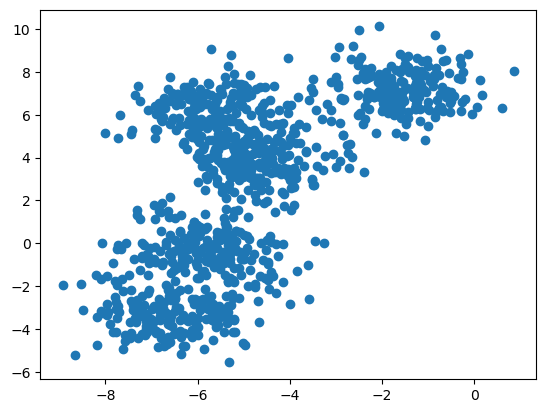

In [9]:
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.9, random_state=np.random.randint(0, 50))
plt.scatter(X[:,0], X[:,1])

In [10]:
X

array([[-4.49131317,  0.13334669],
       [-4.26232611, -0.61007573],
       [-3.86334729,  3.3513162 ],
       ...,
       [-5.65454568, -0.04576356],
       [-6.82784243,  1.52915242],
       [-1.97958675,  7.81169391]])

In [11]:
# while True:
#   try:
#     cent = generateCentroids(3, X[:, 0].min(), X[:, 0].max())
#     X = X.tolist()
#     model = KMeans(3, X, cent)
#     model.setCentroid()
#     break
#   except:
#     continue

In [12]:
X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()

(-8.925139942336635,
 0.8573522523223245,
 -5.565311524587997,
 10.122843767073695)

In [13]:
cent = generateCentroids(3, X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max())
# cent = [[2.7, 2.4], [2.7, 2.6], [2.7, 2.5]]
# X = X.tolist()
model = KMeans(3, X, cent)
cent

least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
generated centroids = [[-8.0, -0.6], [-0.3, 7.4], [-8.6, 3.6]]


[[-8.0, -0.6], [-0.3, 7.4], [-8.6, 3.6]]

least = -89.25139942336635, maximum = 8.573522523223245
least = -55.653115245879974, maximum = 101.22843767073695
generated centroids = [[-8.6, -3.1]]
iter = 0


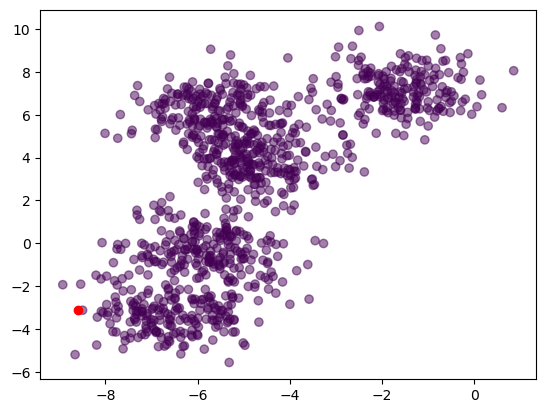

iter = 1


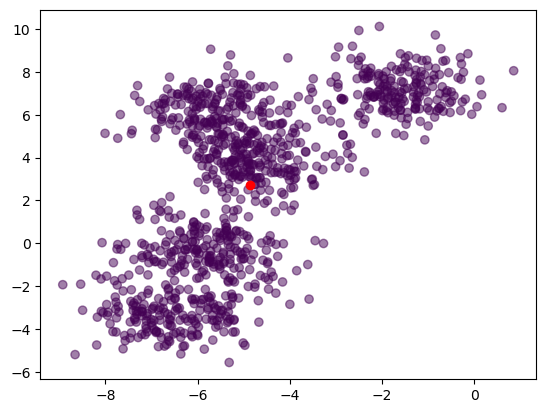

iter = 2


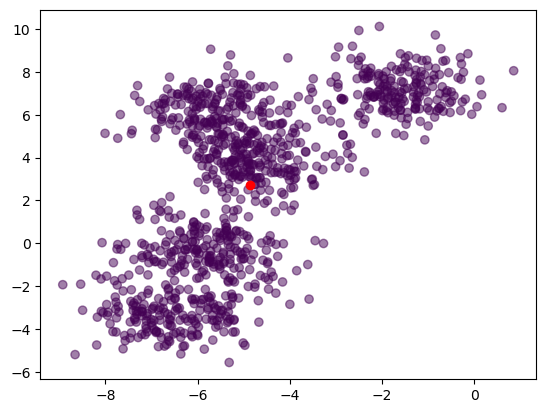

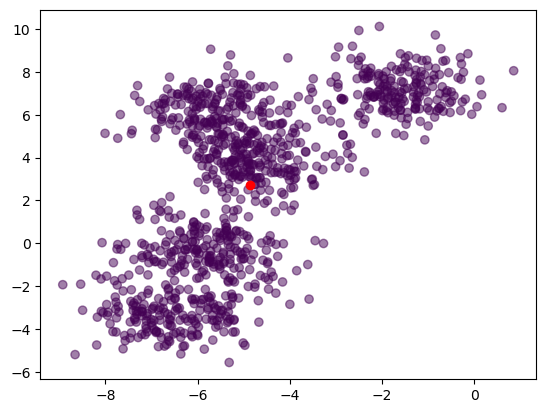

return centroids = [[-4.860267656381337, 2.727038451584142]]
final iteration = 2


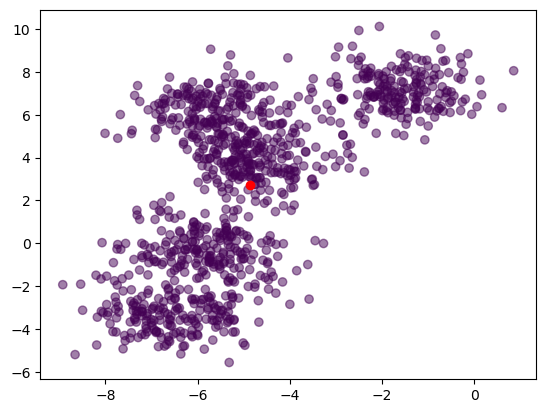

least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
generated centroids = [[-8.3, -2.9], [-3.6, -0.9]]
iter = 0


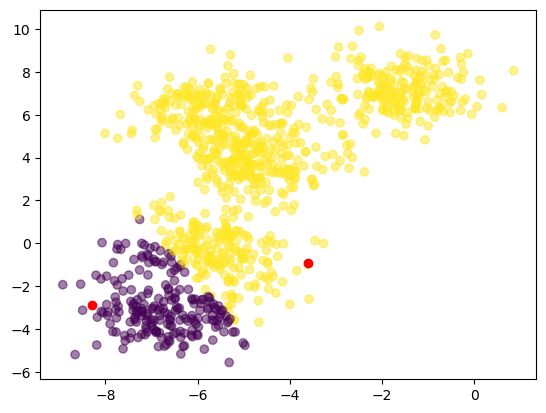

iter = 1


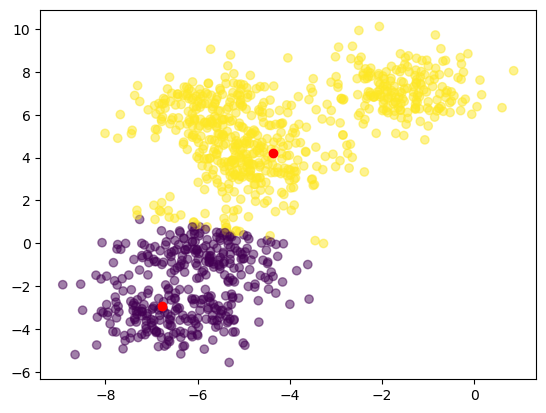

iter = 2


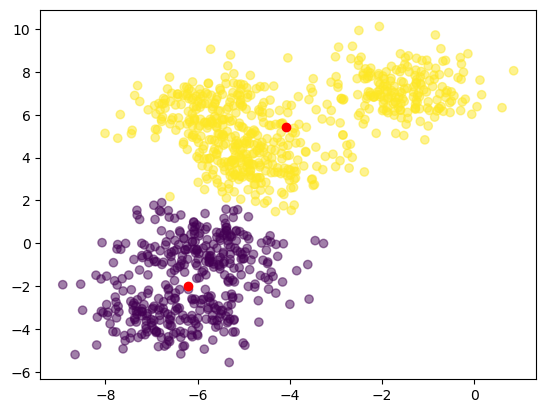

iter = 3


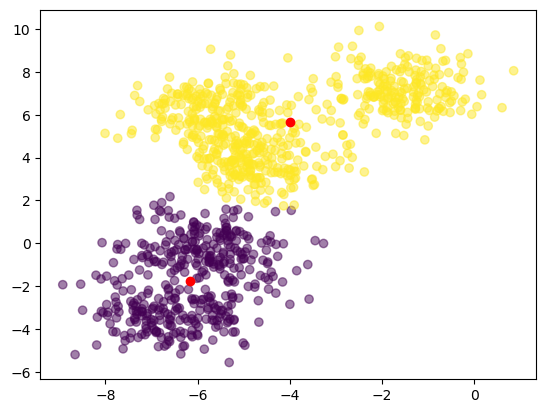

iter = 4


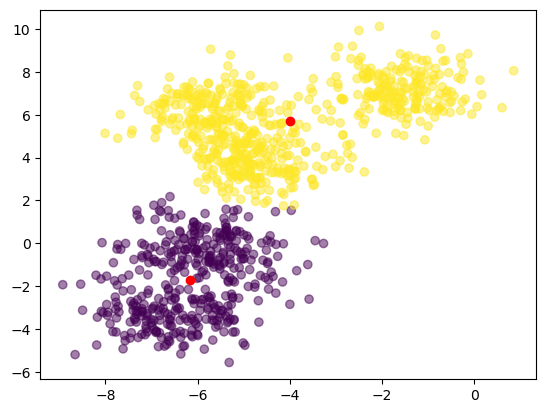

iter = 5


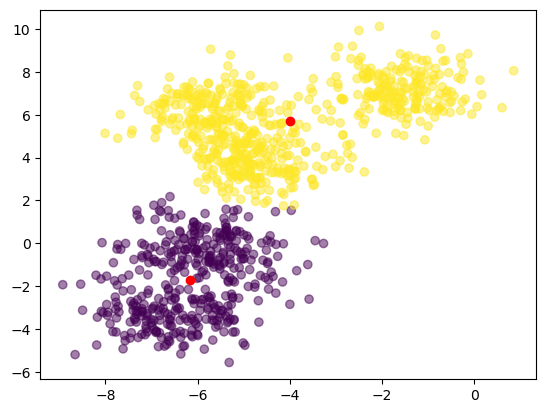

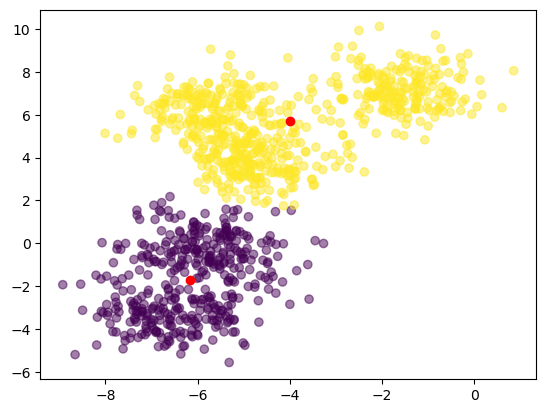

return centroids = [[-6.160693588706587, -1.7349990303027065], [-3.993317034831179, 5.7017301061753765]]
final iteration = 5


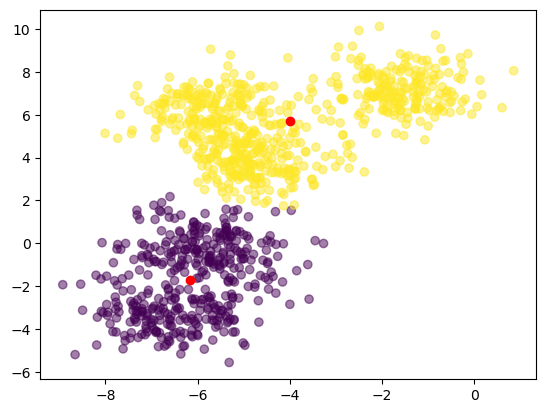

least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
generated centroids = [[-3.2, -0.7], [-7.3, 2.7], [-6.1, 2.2]]
iter = 0


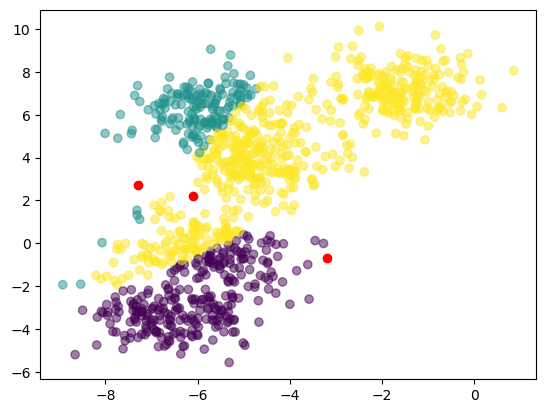

iter = 1


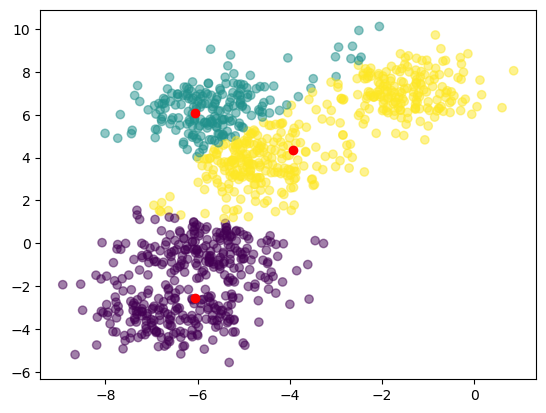

iter = 2


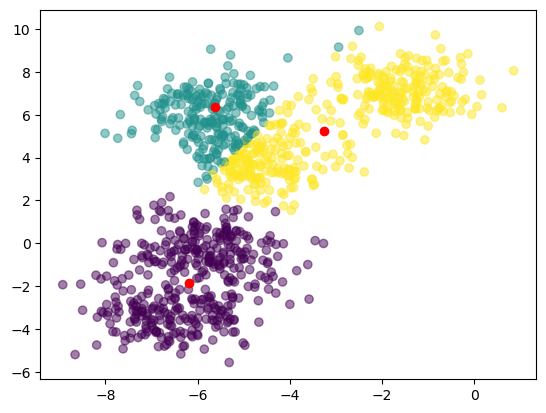

iter = 3


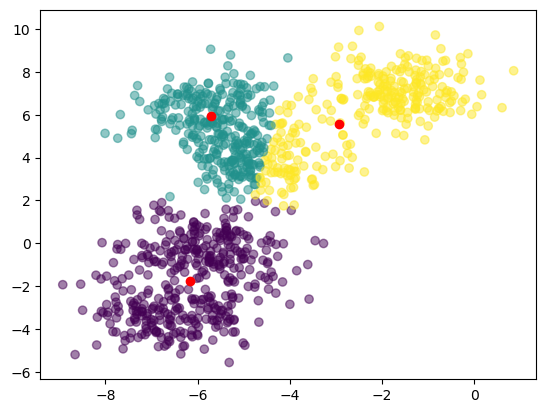

iter = 4


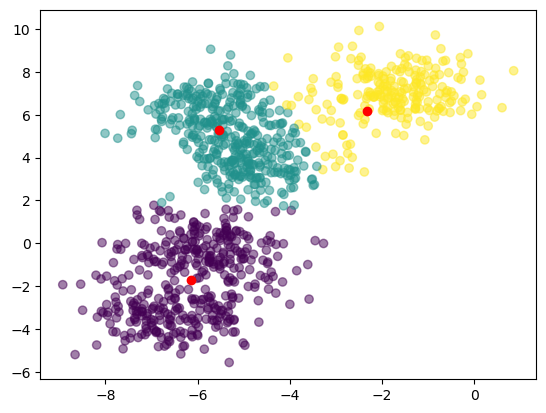

iter = 5


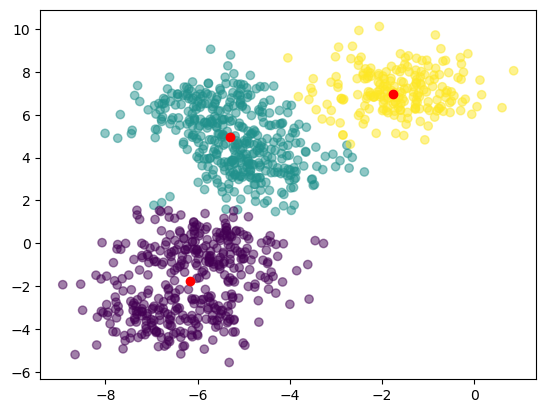

iter = 6


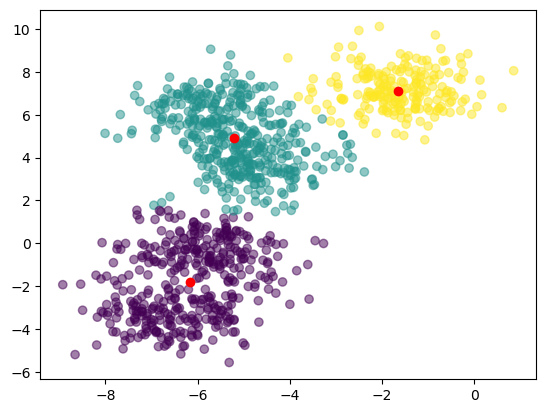

iter = 7


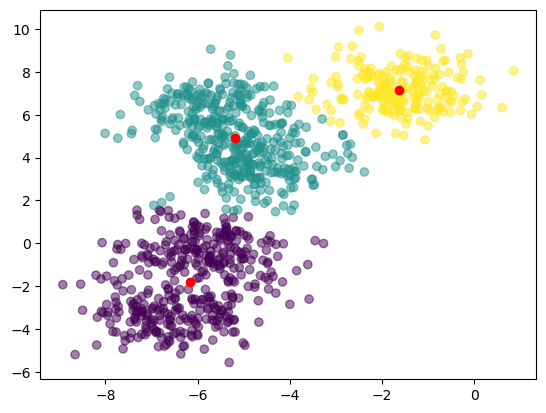

iter = 8


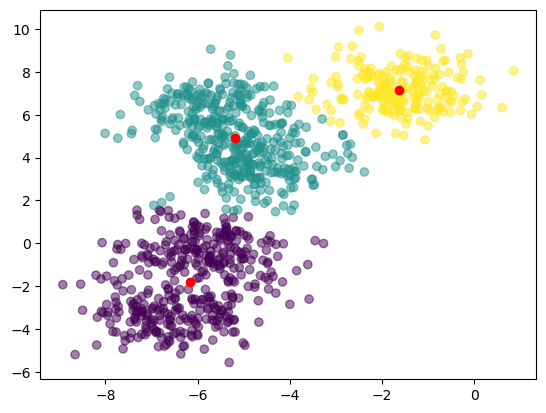

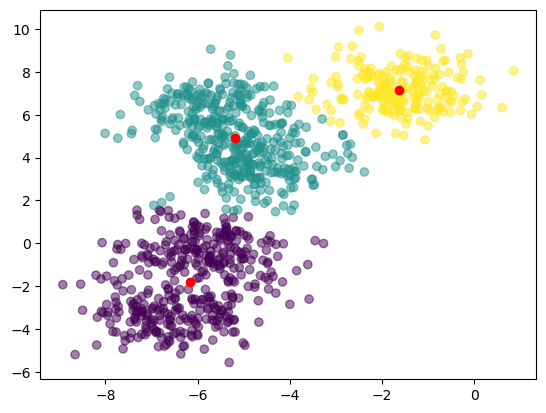

return centroids = [[-6.1733233193959345, -1.8049336205706383], [-5.1821394387525235, 4.901878259143691], [-1.6300601208355168, 7.173030505586022]]
final iteration = 8


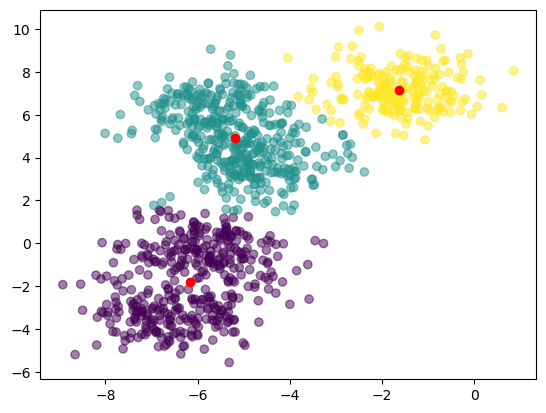

least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
generated centroids = [[-5.1, -1.5], [-4.0, -0.7], [-4.3, 3.0], [-3.2, 1.4]]
iter = 0


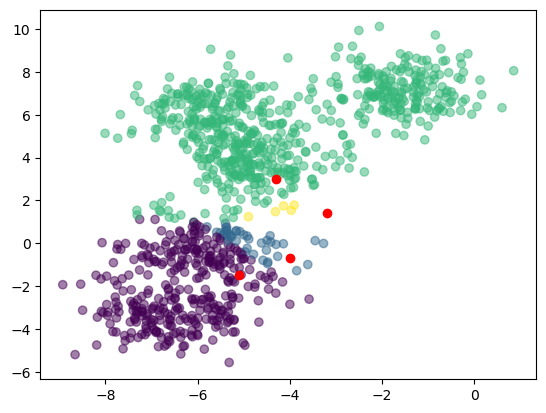

iter = 1


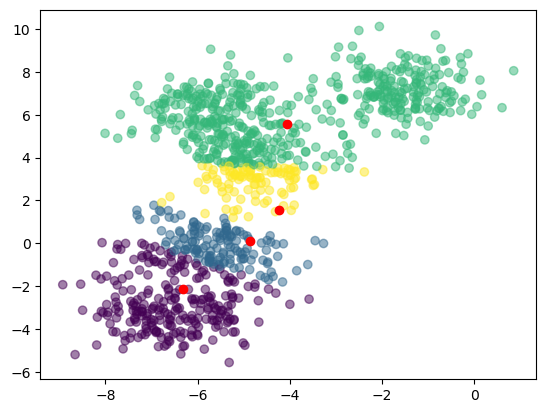

iter = 2


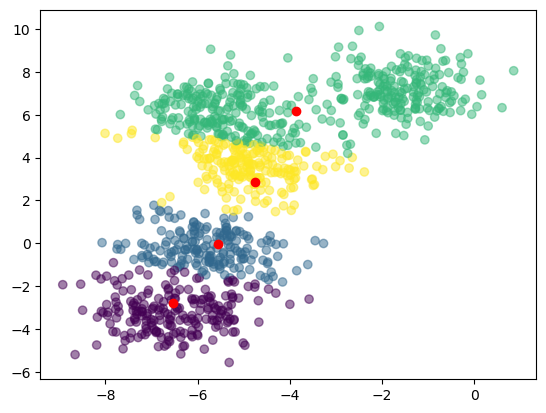

iter = 3


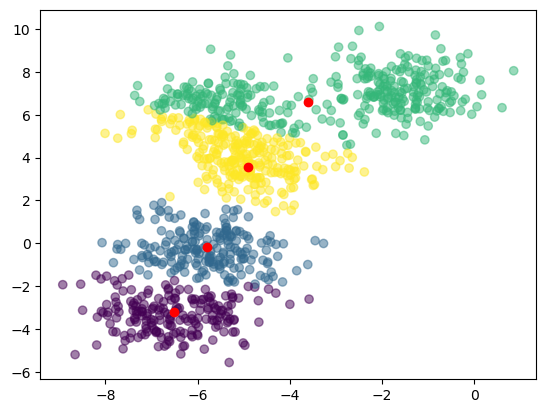

iter = 4


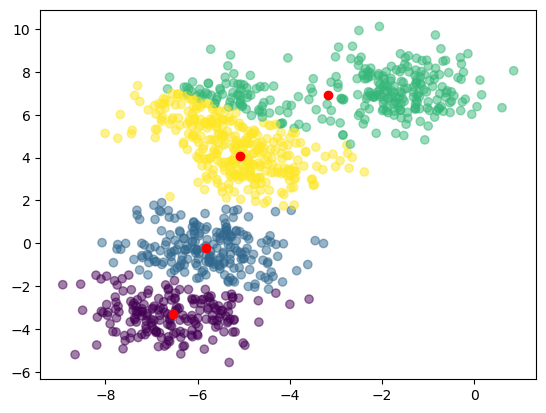

iter = 5


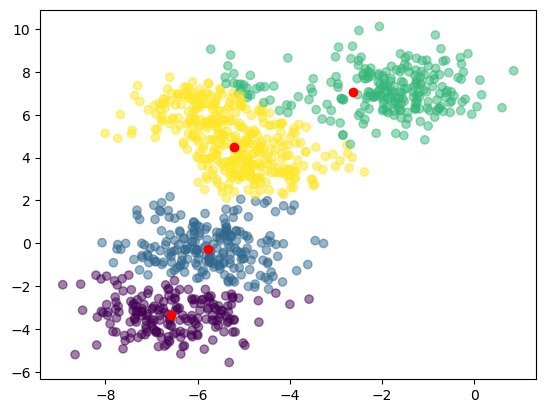

iter = 6


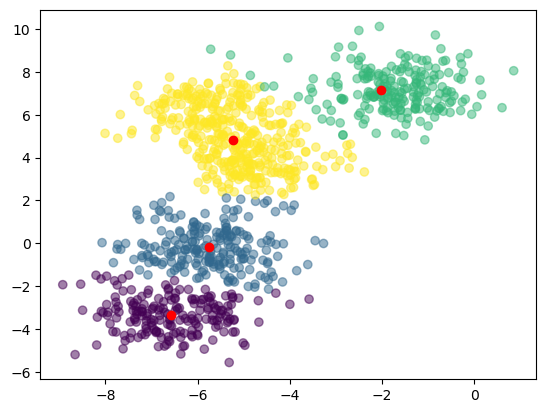

iter = 7


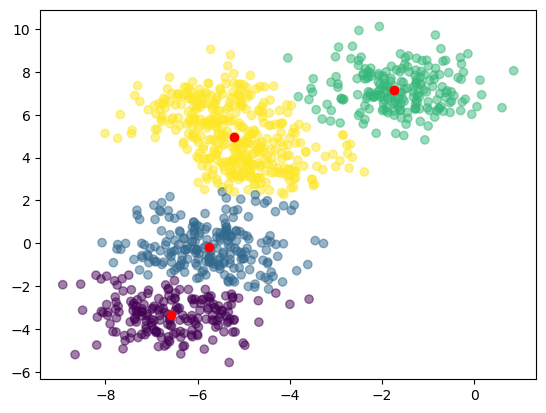

iter = 8


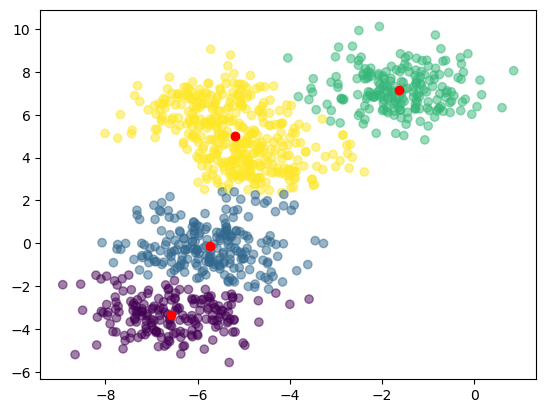

iter = 9


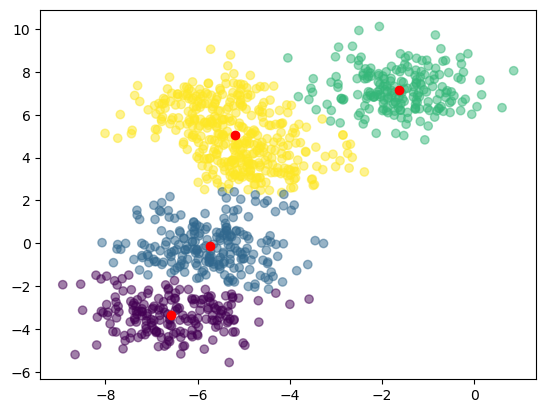

iter = 10


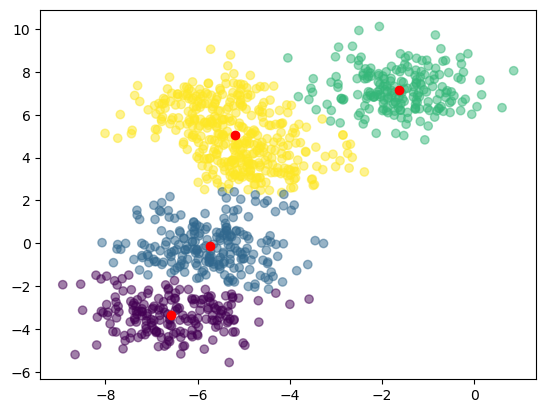

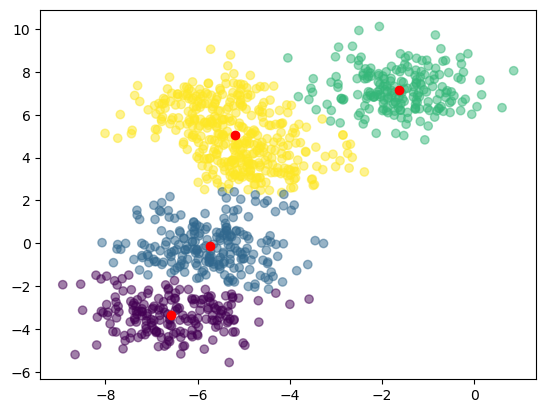

return centroids = [[-6.566573791008046, -3.340446194078996], [-5.728122867017412, -0.12120953418953932], [-1.6300601208355168, 7.173030505586022], [-5.188113381850603, 5.047717594800777]]
final iteration = 10


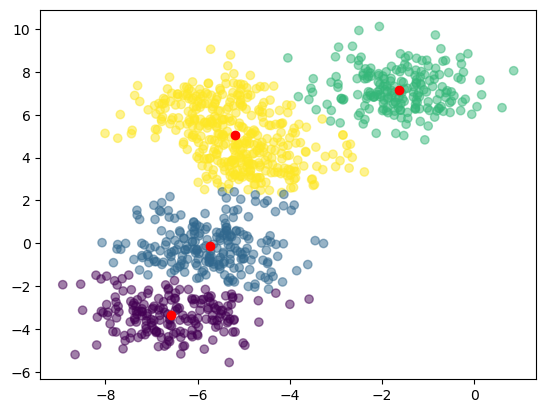

least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -89.25139942336635, maximum = 8.573522523223245
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
least = -55.653115245879974, maximum = 101.22843767073695
generated centroids = [[-5.7, -0.1], [-2.2, -2.9], [-5.2, 5.3], [-1.2, 9.8], [-8.8, 6.0]]
iter = 0


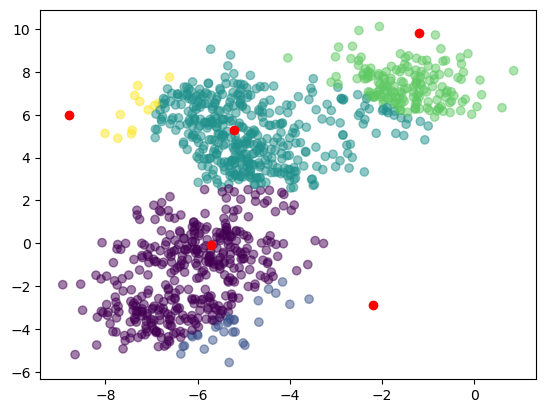

iter = 1


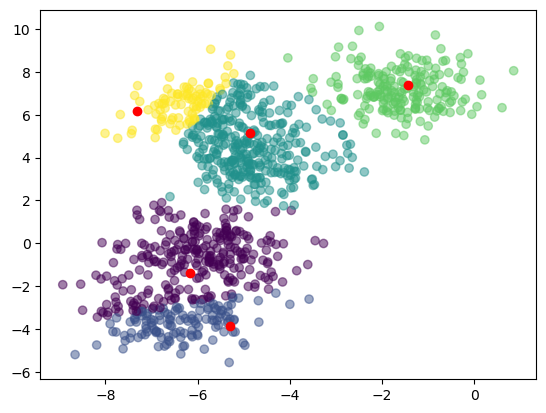

iter = 2


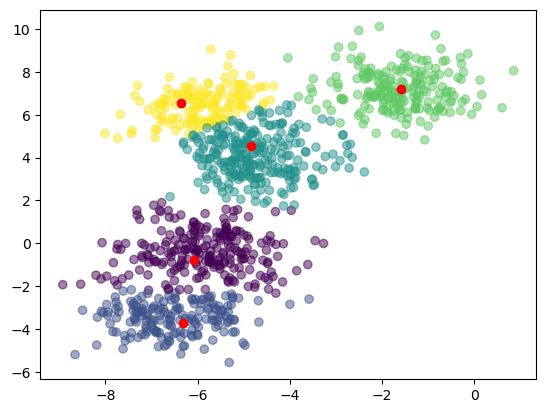

iter = 3


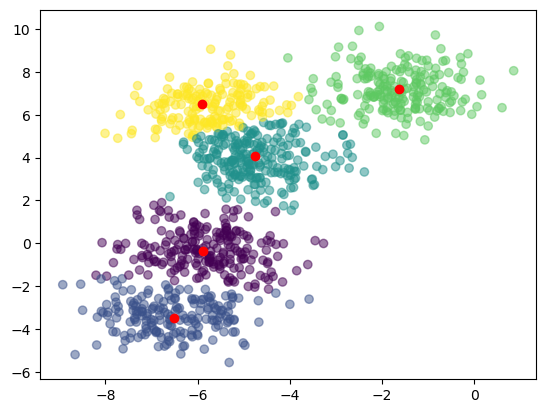

iter = 4


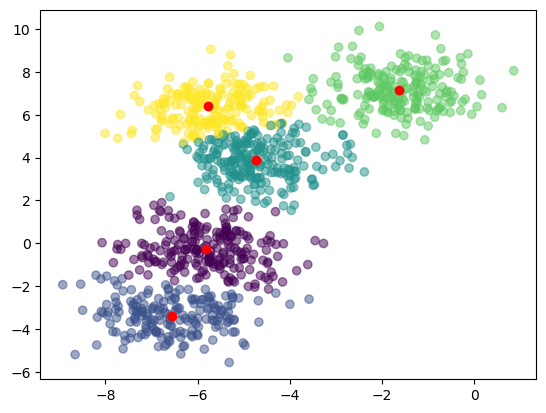

iter = 5


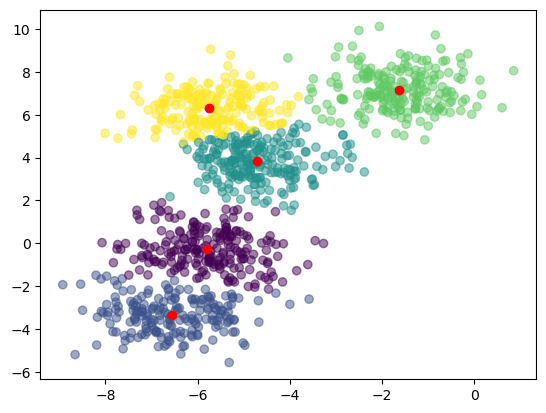

iter = 6


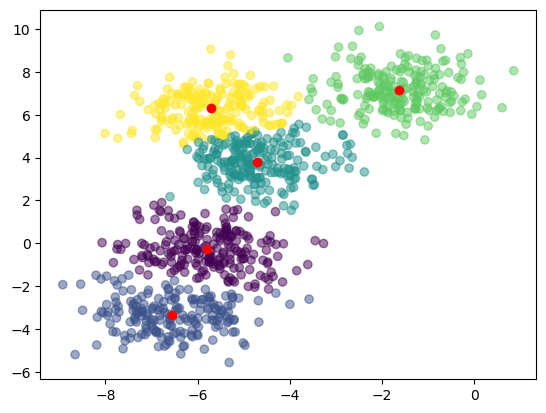

iter = 7


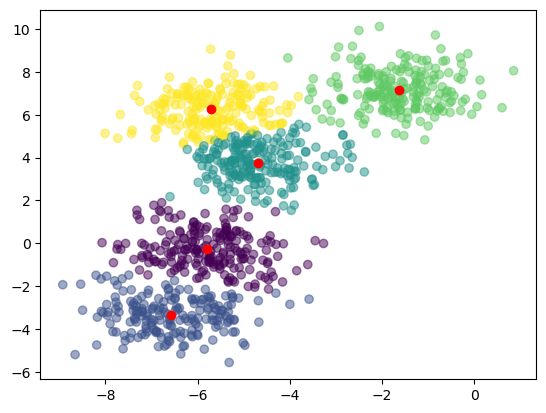

iter = 8


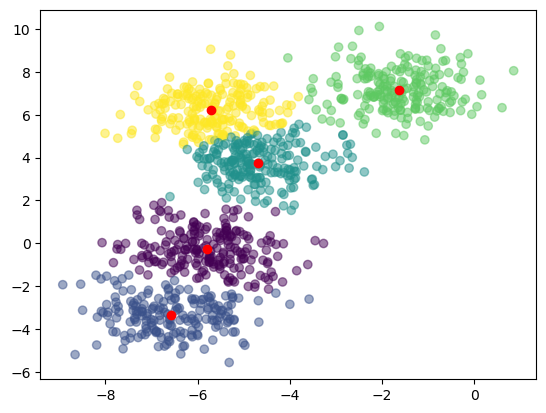

iter = 9


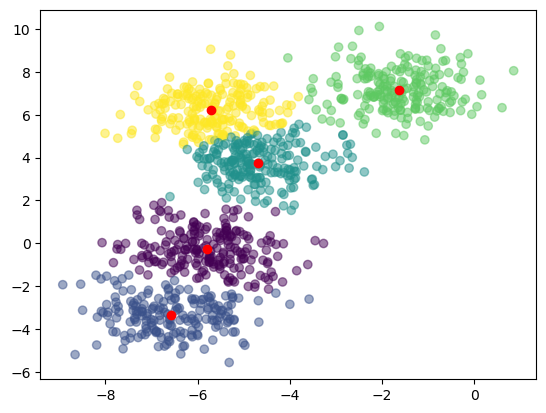

iter = 10


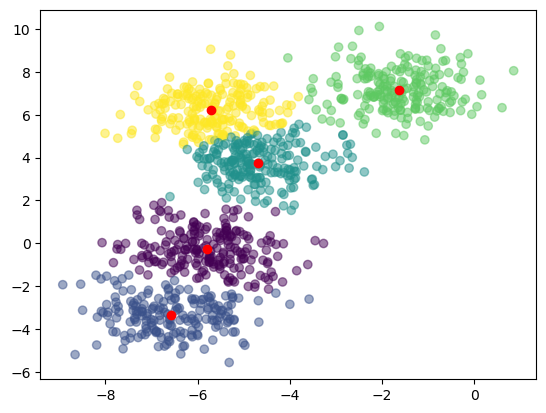

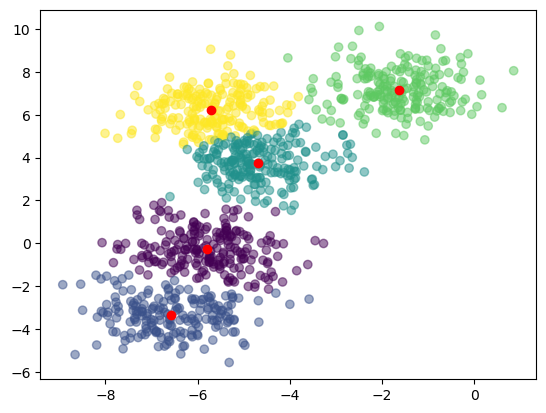

return centroids = [[-5.787134017572984, -0.2585791935217148], [-6.566573791008046, -3.340446194078996], [-4.679199010906498, 3.7442619633191367], [-1.627474473078214, 7.167808361519485], [-5.70496077559505, 6.236561041037844]]
final iteration = 10


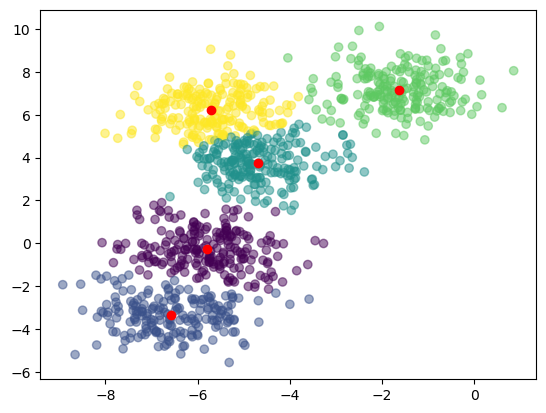

[3761.9188727415894,
 772.3367389427158,
 597.3119492267615,
 455.57741302981594,
 298.4702884298174]

In [14]:
inertias = []
for i in range(1, 6):
    cent = generateCentroids(i, X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max())
    X = X.tolist()
    model = KMeans(i, X, cent)
    model.setCentroid()
    model.calInertia()
    inertias.append(model.inertia)
    X = np.array(X)
inertias

In [15]:
inertias

[3761.9188727415894,
 772.3367389427158,
 597.3119492267615,
 455.57741302981594,
 298.4702884298174]

Text(0.5, 1.0, 'ELBOW')

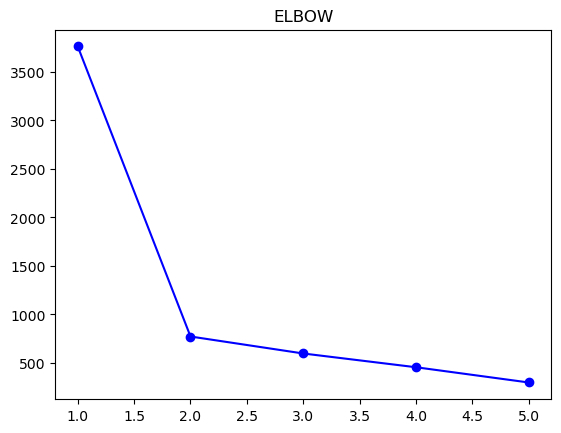

In [16]:
plt.plot(range(1, 6), inertias, 'bo-')
plt.title("ELBOW")